<img src="data\imgs\logo.png" align="right" style="float" width="200">
<font color="#1874CD"><h1 align="left"><b>Datathon PDS06</b></h1></font>
<font color="#6E6E6E"><h2 align="left"><b>Christian Esteve Orts</b></h2></font>
<font color="#6E6E6E"><h3 align="left">Notebook: regresión lineal</h3></font>

---


El ejercicio consta de un problema de regresión, siendo la última columna el target y el resto las potenciales variables predictoras.


## Librerías


In [ ]:
# Gestión de la estrucutra de los datos
import pandas as pd
import numpy as np
import openpyxl

# Gestión de ruta al dataset, por si se necesita cambiar en un futuro a una base de datos o servicio en la nube
from pathlib import Path

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
# Para test normalidad y distribución normal
from scipy import stats  # Para test de normalidad saphiro-wilk

# Para dividir el dataset en train y test
from sklearn.model_selection import train_test_split

## Importación del dataset


In [86]:

DATA_PATH = Path("data/train.xlsx")  # cámbialo aquí si hace falta
df = pd.read_excel(DATA_PATH)
print(f"Número de observaciones y columnas: {df.shape}")
df.head(10)

Número de observaciones y columnas: (772, 11)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,deseada
0,27585.8881,0.00,2.215558,176.46,4.49,1058.60,780.09,28.0,-1.867265,0.900023,21.539230
1,45693.3376,98.06,1.406881,NaN,6.65,1066.00,785.52,NaN,0.633919,0.862797,17.836744
2,110889.0000,0.00,0.000000,192.00,NaN,931.20,842.60,7.0,-0.203045,0.461557,23.404952
3,241081.0000,26.00,2.093422,210.00,3.93,882.00,699.00,28.0,-1.382800,0.338268,55.551081
4,34670.4400,124.10,0.000000,185.70,0.00,1083.40,NaN,28.0,-0.510016,0.603488,17.596806
5,NaN,NaN,NaN,221.40,10.50,819.20,778.40,28.0,-1.280304,0.634104,31.420111
6,62500.0000,0.00,1.985382,187.42,NaN,956.86,861.17,3.0,0.404982,0.404319,13.817099
7,133956.0000,187.00,0.000000,191.30,6.60,824.30,756.90,NaN,NaN,0.071008,65.909079
8,99225.0000,137.00,0.000000,145.00,5.90,1130.00,NaN,28.0,-0.599393,0.239180,81.751169
9,98156.8900,262.20,0.000000,175.50,8.60,1046.90,611.80,3.0,1.538037,NaN,28.799413


Comprobación rápida de datos faltantes


In [ ]:
# NAs
df.isna().sum().sum()

np.int64(774)

Se puede observar de forma rápida que el dataset tiene datos faltantes


In [ ]:
# Obtenemos algunos estadísticos para ver la estructura de los datos para situar los datos faltantes
print(f"Recordar el número de observaciones: {df.shape[0]}")

# T es para transponer la matriz y mejorar la legibilidad
display(df.describe().T)

Recordar el número de observaciones: 772


,count,mean,std,min,25%,50%,75%,max
x1,706.0,92761.097733,68338.519818,10404.000000,37900.302400,76729.000000,131478.760000,291600.000000
x2,685.0,72.037898,86.135309,0.000000,0.000000,20.000000,141.300000,359.400000
x3,703.0,0.882659,1.026148,0.000000,0.000000,0.000000,2.073865,2.292256
x4,690.0,181.944594,21.474526,121.750000,164.925000,185.700000,192.000000,247.000000
x5,698.0,6.168636,6.033556,0.000000,0.000000,6.000000,10.100000,32.200000
x6,704.0,971.787997,79.482087,801.000000,932.000000,967.040000,1034.250000,1145.000000
x7,699.0,772.917167,81.459988,594.000000,725.950000,779.700000,824.000000,992.600000
x8,687.0,45.914119,62.163402,1.000000,14.000000,28.000000,56.000000,365.000000
x9,694.0,0.018116,0.979987,-3.241267,-0.651777,0.046709,0.654966,2.720169
x10,680.0,0.496178,0.287545,0.005230,0.248967,0.497494,0.731890,0.998348


Comparando la columna [mean] con el 50% las variables x4,x6, x7 y x10 parecen tener las mejores distribuciones. También la deseada.


Si comparamos el total de registros [count] de la columna target "deseada" con las variables predictoras, se puede comprobar que hay datos faltantes en todas las variables.


<div class="alert" style="
  border:3px solid #003366;          /* azul oscuro */
  border-radius:5px;
  background-color:#CFE8FF;          /* azul claro (relleno) */
  color:#003366;                     /* azul oscuro (fuente) */
  font-family:Verdana, sans-serif;
  font-size:32px;
  padding:4px 8px;">  
  Análisis exploratorio de los datos
</div>


### Gráfico de distribución para cada variable numérica


Text(0.5, 0.98, 'Distribución de variables numéricas')

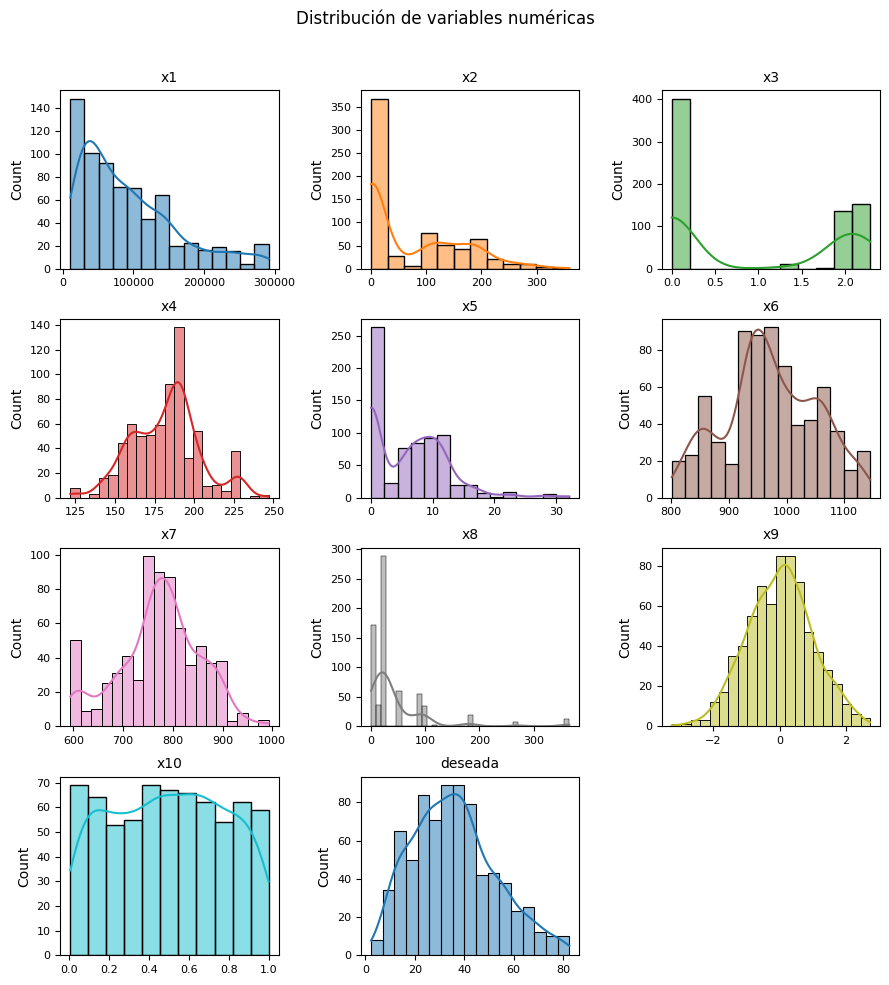

In [ ]:
# Repasar los comentarios del código y cambiarlos a mejoras expositivas

import math  # Para calcular el número de filas necesarias


# --- Selección de variables y dimensionado del lienzo ---

columnas_numeric = df.select_dtypes(include=np.number).columns
n_vars = len(columnas_numeric)
if n_vars == 0:
    raise ValueError("El DataFrame no contiene columnas numéricas.")

# Máximo de columnas de subplots por fila (ajustable cambiando esta variable)
ncols = 3
# Filas necesarias para cubrir todas las variables
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(3*ncols, 2.5*nrows))

# Convertir a array 1D para indexar sin errores, incluso si hay una sola fila/columna
axes = np.atleast_1d(axes).ravel()

# Paleta de colores (rotará si hay más variables que colores)
palette = sns.color_palette(n_colors=max(n_vars, 6))

# --- Bucle de trazado: un histograma por variable numérica ---
for i, col in enumerate(columnas_numeric):
    ax = axes[i]
    sns.histplot(
        data=df, x=col, stat="count", kde=True,
        color=palette[i % len(palette)], ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_xlabel("")

# --- Ocultar ejes no usados (si la rejilla quedó más grande de lo necesario) ---
for ax in axes[n_vars:]:
    ax.set_visible(False)

# --- Ajustes finales de maquetación ---
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=12)

Según las gráficas , las variables x4, x6, x7 y x9 tienen las mejores distribuciones. La columna a predecir [deseada] tiene una buena distribución.


### Test de Saphiro

Para


In [ ]:
# Normalidad en la variable respuesta "deseada"

shapiro_test = stats.shapiro(df["deseada"])
print(
    f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

Test Shapiro-Wilk: estadístico = 0.977448345500092, p-value = 1.538592711759505e-09


El test Shapiro-Wilk contrasta la hipótesis nula de distribución normal de los datos. La variable respuesta [deseada] obtenemos un p-valor superior a 0,05 (nivel de confianza de un 95%) y, por lo tanto, podemos aceptar la hipótesis nula y asumir que la distrubución es normal.


# Correlaciones


Generamos la matriz directamente, ya que la visualización es mejor.


<Axes: >

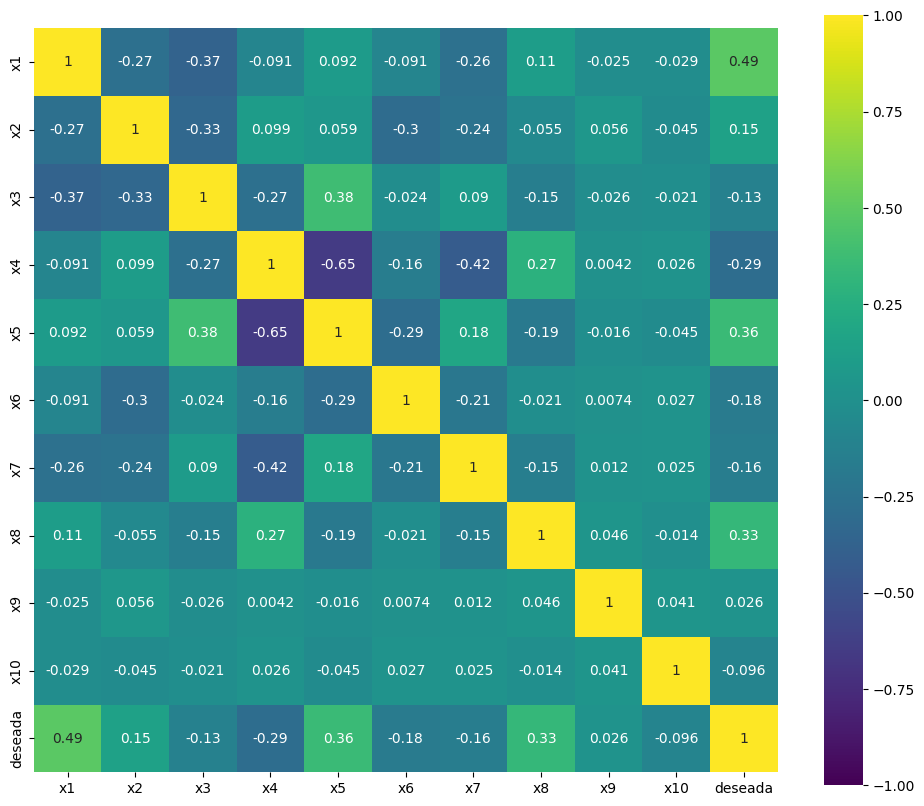

In [ ]:
# Matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            cmap="viridis",
            vmin=-1, vmax=1,  # Evitamos el cálculo automático de los límites
            annot=True,
            cbar=True,
            square=True)

Conclusión: x1 es el predictor lineal más potente; x5, x8 y x4 (con signo opuesto) aportan información adicional. El resto apenas correlaciona linealmente con la respuesta.

La matriz revela que x1 es el predictor lineal dominante (ρ ≈ 0.49) seguido de x5 y x8; x4 ejerce un efecto inverso (ρ ≈ -0.29).

La única colinealidad preocupante es el fuerte anticorrelación x4-x5 (-0.65). Por ello, vigilaré VIF o usaré regularización para evitar inestabilidad en un modelo lineal. En cambio, un modelo basado en árboles manejaría bien estas correlaciones moderadas.


# Distribución de cada variable enfrentada al resto


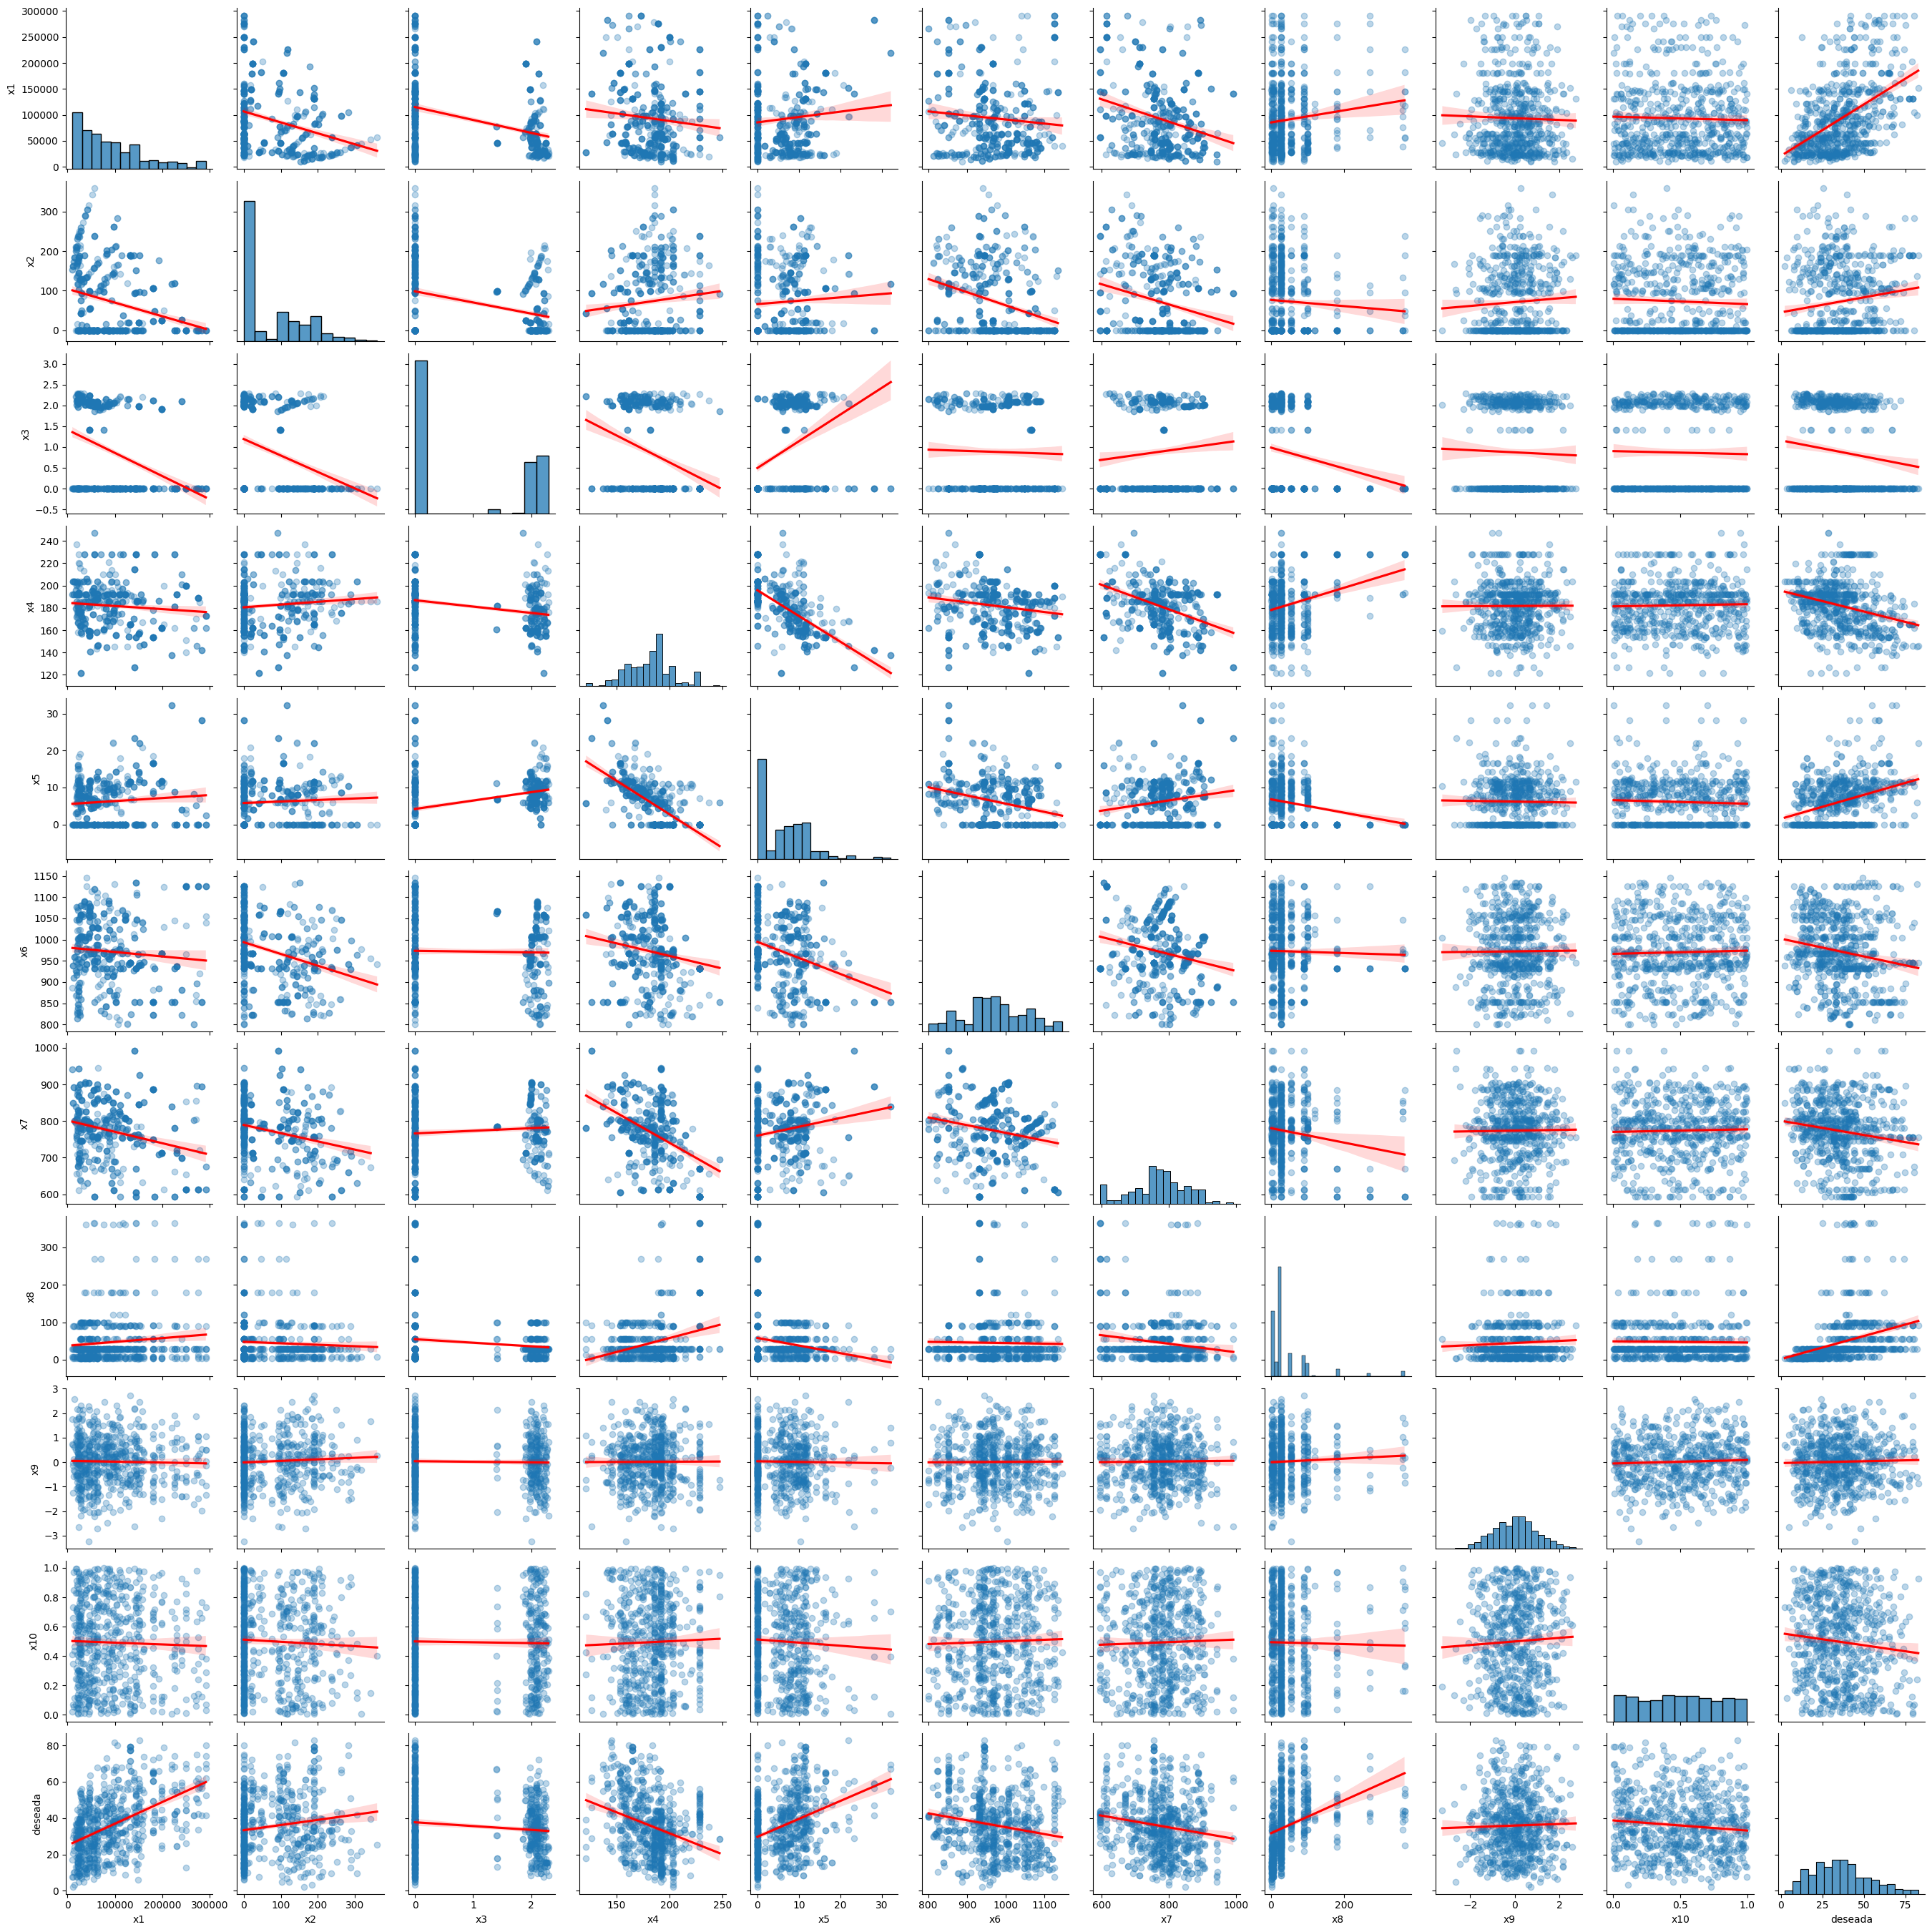

In [ ]:


# Distribución de cada variable enfrentada al resto
sns.pairplot(df, kind="reg",
             plot_kws={"line_kws": {"color": "red"},
                       "scatter_kws": {"alpha": 0.3}})

plt.show()

Tendencias lineales claras con el target: x1, x5, x8 (positivas) x4 (negativa). Refuerza lo se ve en la matriz de correlación: serán los predictores más prometedores.

Relación negativa marcada entre predictores x4 ↔ x5 Evidencia visual de su colinealidad moderada (r ≈ −0,65). Conviene monitorizar VIF o usar regularización.

Escalas muy dispares, por ejemplo x1 y x9. Será necesario la normalización de las variables predictoras.

Las distribucuines de cola pesada de x1 (potancialmente el predictor principal), x2 y x5 son susceptibles de necesitar transformación por BosCox o Yeo-Johnson.

x9 y, en menor medida, x10 (todas las dispersión–[deseada] son nubes sin patrón)

x3 es pobre en colinealidad y presenta una gran cantidad de valores en 0, por lo que es candidata a excluirse.



# División del dataset


In [ ]:
# División en entrenamiento y test
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True)

# Ahora dividimos en X e y
# Dataframe entrenamiento con la variable respuesta
y_train = df_train["deseada"]
y_test = df_test["deseada"]  # Dataframe test con la variable respuesta

# Dataframe entrenamiento con las variables predictoras
X_train = df_train.drop("deseada", axis=1)
# Dataframe test con las variables predictoras
X_test = df_test.drop("deseada", axis=1)

In [ ]:
# Comprobamos dimensiones
print(f"Dimensiones train: {X_train.shape}.")
print(f"Dimensiones test: {X_test.shape}.")

Dimensiones train: (617, 10).
Dimensiones test: (155, 10).
